<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(2_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.4'

In [4]:
os.listdir(base_path)

['data_add_delta_2.4_n20.csv',
 'data_add_delta_2.4_n30.csv',
 'data_add_delta_2.4_n60.csv',
 'data_add_delta_2.4_n120.csv',
 'data_add_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.411221,53.013147,54.402532,108.343567,320.170467,227.461676,92.708791
1,0.0,1.0,28.938610,26.561925,28.491017,43.081542,137.073094,83.198248,53.874846
2,0.0,2.0,26.325957,96.620437,99.639481,-20.395259,212.190617,283.784625,-71.594009
3,0.0,3.0,92.953662,47.589834,74.549904,54.516527,279.609927,224.620736,54.989191
4,0.0,4.0,78.364570,72.092164,28.380350,-13.971919,174.865166,240.648885,-65.783720
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.127925,38.093636,44.900109,-55.065695,61.055975,90.433320,-29.377345
59996,999.0,56.0,74.032957,56.119272,53.154222,130.349277,323.655729,171.581872,152.073857
59997,999.0,57.0,21.297985,40.059531,92.196508,50.930832,214.484856,121.260065,93.224790
59998,999.0,58.0,21.360695,55.599755,28.796491,27.317469,143.074409,66.446031,76.628378


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.411221,53.013147,54.402532,108.343567,320.170467,227.461676,92.708791
1,0.0,1.0,28.938610,26.561925,28.491017,43.081542,137.073094,83.198248,53.874846
2,0.0,2.0,26.325957,96.620437,99.639481,-20.395259,212.190617,283.784625,-71.594009
3,0.0,3.0,92.953662,47.589834,74.549904,54.516527,279.609927,224.620736,54.989191
4,0.0,4.0,78.364570,72.092164,28.380350,-13.971919,174.865166,240.648885,-65.783720
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.127925,38.093636,44.900109,-55.065695,61.055975,90.433320,-29.377345
59996,999.0,56.0,74.032957,56.119272,53.154222,130.349277,323.655729,171.581872,152.073857
59997,999.0,57.0,21.297985,40.059531,92.196508,50.930832,214.484856,121.260065,93.224790
59998,999.0,58.0,21.360695,55.599755,28.796491,27.317469,143.074409,66.446031,76.628378


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    94.411221  53.013147  ...  227.461676   92.708791
      1.0    28.938610  26.561925  ...   83.198248   53.874846
      2.0    26.325957  96.620437  ...  283.784625  -71.594009
      3.0    92.953662  47.589834  ...  224.620736   54.989191
      4.0    78.364570  72.092164  ...  240.648885  -65.783720
...                ...        ...  ...         ...         ...
999.0 55.0   23.127925  38.093636  ...   90.433320  -29.377345
      56.0   74.032957  56.119272  ...  171.581872  152.073857
      57.0   21.297985  40.059531  ...  121.260065   93.224790
      58.0   21.360695  55.599755  ...   66.446031   76.628378
      59.0   86.052547  21.712453  ...  241.613214  -11.482828

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    94.411221  53.013147  ...  227.461676   92.708791
      1.0    28.938610  26.561925  ...   83.198248   53.874846
      2.0    26.325957  96.620437  ...  283.784625  -71.594009
      3.0    92.953662  47.589834  ...  224.620736   54.989191
      4.0    78.364570  72.092164  ...  240.648885  -65.783720
...                ...        ...  ...         ...         ...
999.0 55.0   23.127925  38.093636  ...   90.433320  -29.377345
      56.0   74.032957  56.119272  ...  171.581872  152.073857
      57.0   21.297985  40.059531  ...  121.260065   93.224790
      58.0   21.360695  55.599755  ...   66.446031   76.628378
      59.0   86.052547  21.712453  ...  241.613214  -11.482828

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.411221,53.013147,54.402532,108.343567,320.170467,227.461676,92.708791
1,0.0,1.0,28.938610,26.561925,28.491017,43.081542,137.073094,83.198248,53.874846
2,0.0,2.0,26.325957,96.620437,99.639481,-20.395259,212.190617,283.784625,-71.594009
3,0.0,3.0,92.953662,47.589834,74.549904,54.516527,279.609927,224.620736,54.989191
4,0.0,4.0,78.364570,72.092164,28.380350,-13.971919,174.865166,240.648885,-65.783720
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,23.127925,38.093636,44.900109,-55.065695,61.055975,90.433320,-29.377345
59996,999.0,56.0,74.032957,56.119272,53.154222,130.349277,323.655729,171.581872,152.073857
59997,999.0,57.0,21.297985,40.059531,92.196508,50.930832,214.484856,121.260065,93.224790
59998,999.0,58.0,21.360695,55.599755,28.796491,27.317469,143.074409,66.446031,76.628378


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    94.411221  53.013147  ...  227.461676   92.708791
      1.0    28.938610  26.561925  ...   83.198248   53.874846
      2.0    26.325957  96.620437  ...  283.784625  -71.594009
      3.0    92.953662  47.589834  ...  224.620736   54.989191
      4.0    78.364570  72.092164  ...  240.648885  -65.783720
...                ...        ...  ...         ...         ...
999.0 55.0   23.127925  38.093636  ...   90.433320  -29.377345
      56.0   74.032957  56.119272  ...  171.581872  152.073857
      57.0   21.297985  40.059531  ...  121.260065   93.224790
      58.0   21.360695  55.599755  ...   66.446031   76.628378
      59.0   86.052547  21.712453  ...  241.613214  -11.482828

[60000 rows x 7 columns]

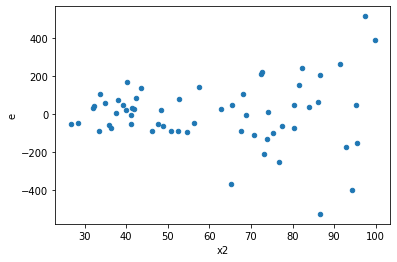

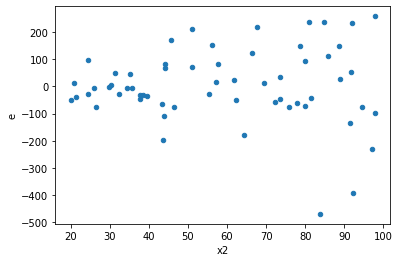

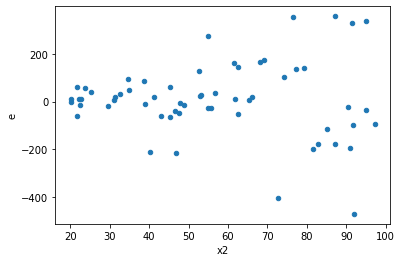

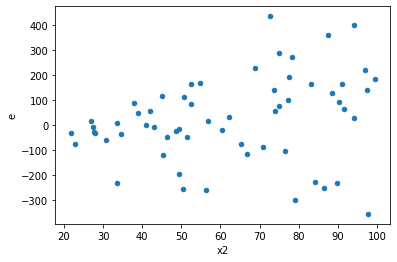

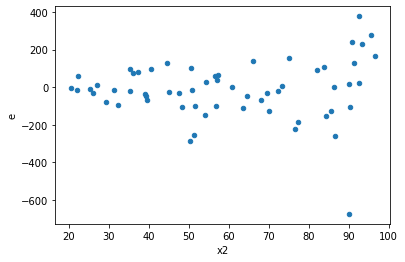

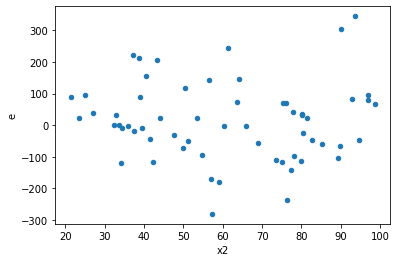

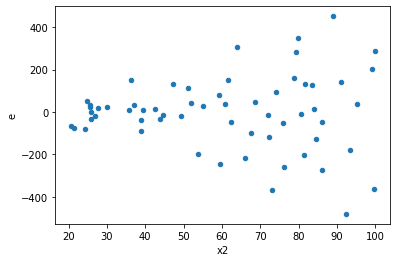

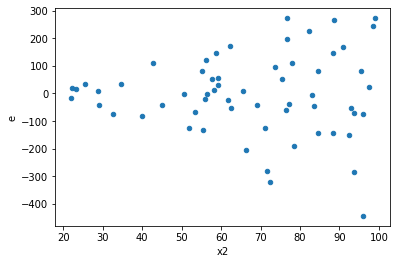

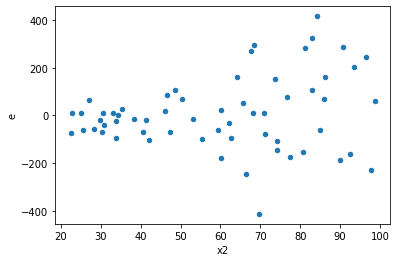

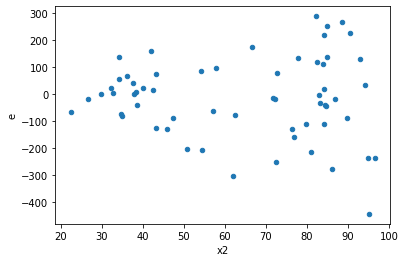

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,135622.89910600494,1523976.4605189208,6458.23329076214,72570.30764375813,11.236866860719127,6.572247117642149e-07,0.9999996713876441,3.2861235588210747e-07,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,82073.96393389217,448651.83529506234,3908.283996852008,21364.37310928868,5.466433126788373,0.0002637005038299556,0.999868149748085,0.0001318502519149778,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,56994.89443537806,726855.386993108,2714.04259216086,34612.16128538609,12.752991196733086,2.0960008417780784e-07,0.9999998951999579,1.0480004208890392e-07,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,153423.1543493059,1133464.6226322555,7305.86449282409,53974.505839631216,7.387832869422317,2.4297549120921857e-05,0.9999878512254395,1.2148774560460929e-05,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,132671.20138435878,705227.1232760354,6317.676256398037,33582.24396552549,5.315600642169038,0.00032563194546475493,0.9998371840272676,0.00016281597273237747,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,154637.7943823954,854912.5166489256,7363.704494399781,40710.11984042503,5.528483641811775,0.00024205727639570185,0.9998789713618021,0.00012102863819785092,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,145623.0379115225,1248449.3708178215,6934.430376739167,59449.97003894388,8.573158400776896,6.9855370667948335e-06,0.9999965072314666,3.4927685333974168e-06,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,137473.15820025912,849608.111483967,6546.340866679006,40457.52911828415,6.180174534481348,0.00010226352806075312,0.9999488682359696,5.113176403037656e-05,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,157095.7624156369,1047708.0045571566,7480.750591220805,49890.857359864596,6.66923148305667,5.58435444546479e-05,0.9999720782277727,2.792177222732395e-05,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,135622.89910600494,1523976.4605189208,6458.23329076214,72570.30764375813,11.236866860719127,6.572247117642149e-07,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,82073.96393389217,448651.83529506234,3908.283996852008,21364.37310928868,5.466433126788373,0.0002637005038299556,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,56994.89443537806,726855.386993108,2714.04259216086,34612.16128538609,12.752991196733086,2.0960008417780784e-07,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,153423.1543493059,1133464.6226322555,7305.86449282409,53974.505839631216,7.387832869422317,2.4297549120921857e-05,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,132671.20138435878,705227.1232760354,6317.676256398037,33582.24396552549,5.315600642169038,0.00032563194546475493,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,154637.7943823954,854912.5166489256,7363.704494399781,40710.11984042503,5.528483641811775,0.00024205727639570185,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,145623.0379115225,1248449.3708178215,6934.430376739167,59449.97003894388,8.573158400776896,6.9855370667948335e-06,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,137473.15820025912,849608.111483967,6546.340866679006,40457.52911828415,6.180174534481348,0.00010226352806075312,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,157095.7624156369,1047708.0045571566,7480.750591220805,49890.857359864596,6.66923148305667,5.58435444546479e-05,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    971
Reject005=1 : Homoscedasticity       29
Name: Result_test, dtype: int64